<a href="https://colab.research.google.com/github/PRAKASHMS7/Phishing-Detection-By-Using-ML-Models/blob/main/Embedded_Based_Approach/REGULARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Load your dataset
data = pd.read_csv('/content/All.csv')

# Separate features and target variable
X = data.drop('URL_Type_obf_Type', axis=1)  # Replace 'URL_Type_obf_Type' with your actual target column name
y = data['URL_Type_obf_Type']  # Replace with the actual target column name

# Convert target variable to numerical labels if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle missing, infinity, or large values
X = X.replace([float('inf'), float('-inf')], float('nan'))  # Replace infinities with NaN
X = X.fillna(X.mean())  # Fill NaN with column mean (you can use median or mode as well)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed (higher alpha means stronger regularization)
lasso.fit(X_scaled, y_encoded)

# Get feature importance (coefficients)
importance = pd.Series(lasso.coef_, index=X.columns)

# Extract the 40 most important features
important_features = importance.abs().sort_values(ascending=False).head(40)
print("Lasso Important Features:\n", important_features)

# Apply Ridge (L2 Regularization)
ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge.fit(X_scaled, y_encoded)

# Get feature importance (coefficients)
importance_ridge = pd.Series(ridge.coef_, index=X.columns)

# Extract the 40 most important features
important_features_ridge = importance_ridge.abs().sort_values(ascending=False).head(40)
print("Ridge Important Features:\n", important_features_ridge)

# Apply ElasticNet (Combination of L1 and L2)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances L1 and L2 regularization
elastic_net.fit(X_scaled, y_encoded)

# Get feature importance (coefficients)
importance_elastic_net = pd.Series(elastic_net.coef_, index=X.columns)

# Extract the 40 most important features
important_features_elastic_net = importance_elastic_net.abs().sort_values(ascending=False).head(40)
print("ElasticNet Important Features:\n", important_features_elastic_net)


Lasso Important Features:
 SymbolCount_Directoryname          0.288089
SymbolCount_Domain                 0.261925
Arguments_LongestWordLength        0.243282
Extension_DigitCount               0.182798
delimeter_path                     0.128754
dld_path                           0.089910
avgpathtokenlen                    0.049738
dld_getArg                         0.015299
NumberofDotsinURL                  0.014586
NumberRate_URL                     0.014190
URL_sensitiveWord                  0.010208
sub-Directory_LongestWordLength    0.000000
URLQueries_variable                0.000000
URL_Letter_Count                   0.000000
host_letter_count                  0.000000
Path_LongestWordLength             0.000000
Filename_LetterCount               0.000000
Domain_LongestWordLength           0.000000
spcharUrl                          0.000000
Directory_LetterCount              0.000000
LongestPathTokenLength             0.000000
Query_LetterCount                  0.000000
Exten

Accuracy: 0.7448
Precision: 0.7428
Recall: 0.7448
F1 Score: 0.7417
AUC Score: 0.9384


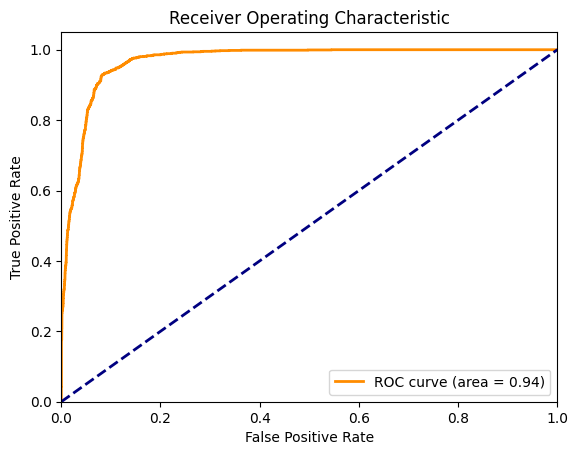

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('/content/All.csv')

# Separate features and target variable
X = data.drop('URL_Type_obf_Type', axis=1)  # Replace 'URL_Type_obf_Type' with your actual target column name
y = data['URL_Type_obf_Type']  # Replace with the actual target column name

# Convert target variable to numerical labels if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle missing, infinity, or large values
X = X.replace([float('inf'), float('-inf')], float('nan'))  # Replace infinities with NaN
X = X.fillna(X.mean())  # Fill NaN with column mean (you can use median or mode as well)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed (higher alpha means stronger regularization)
lasso.fit(X_scaled, y_encoded)

# Get feature importance (coefficients)
importance = pd.Series(lasso.coef_, index=X.columns)

# Extract the 40 most important features
important_features = importance.abs().sort_values(ascending=False).head(40)

# Map the important features to their respective indices
important_feature_names = important_features.index  # Get the names of the important features
important_feature_indices = [list(X.columns).index(name) for name in important_feature_names]  # Map names to indices

# Select important features for modeling
X_selected = X_scaled[:, important_feature_indices]  # Select the important columns using the indices

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # For ROC curve, we need probability estimates for class 1

# Calculate performance metrics for multiclass
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass

# AUC requires probability scores for only one class
auc_score = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=clf.classes_[1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


SymbolCount_Directoryname          0.311067
Arguments_LongestWordLength        0.255400
Extension_DigitCount               0.245091
delimeter_path                     0.129266
avgpathtokenlen                    0.110734
SymbolCount_Domain                 0.107257
dld_getArg                         0.096431
tld                                0.089292
domain_token_count                 0.089093
charcompvowels                     0.061896
URL_sensitiveWord                  0.058991
NumberofDotsinURL                  0.040157
dld_path                           0.033983
this.fileExtLen                    0.028752
NumberRate_URL                     0.022366
File_name_DigitCount               0.015228
Entropy_URL                        0.015173
delimeter_Domain                   0.002585
Domain_LongestWordLength           0.000000
Path_LongestWordLength             0.000000
sub-Directory_LongestWordLength    0.000000
spcharUrl                          0.000000
LongestPathTokenLength             0.000000
Query_LetterCount                  0.000000
Extension_LetterCount              0.000000
URLQueries_variable                0.000000
Filename_LetterCount               0.000000
Querylength                        0.000000
NumberRate_Domain                  0.000000
delimeter_Count                    0.000000
host_letter_count                  0.000000
NumberRate_DirectoryName           0.000000
NumberRate_FileName                0.000000
NumberRate_Extension               0.000000
NumberRate_AfterPath               0.000000
SymbolCount_URL                    0.000000
SymbolCount_FileName               0.000000
SymbolCount_Extension              0.000000
SymbolCount_Afterpath              0.000000
Entropy_Domain                     0.000000




Accuracy: 0.7448
Precision: 0.7428
Recall: 0.7448
F1 Score: 0.7417
AUC Score: 0.9384